In [276]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from brokenaxes import brokenaxes

In [277]:
sns.set_context('talk')

## Constants

In [278]:
C = (100*299792458/1E9) # Convert [/cm] to [GHz]

## Plotting n=98-99 spectra

In [239]:
# data_ex contains the spectra data
data_ex = pd.read_excel('Rydberg_Spectra-20180516.xlsx', sheet_name='5s98s-5s99s')

# data_th contains data used to calculate the theoretically predicted positions
data_th = pd.read_csv('n98-99_data.csv')

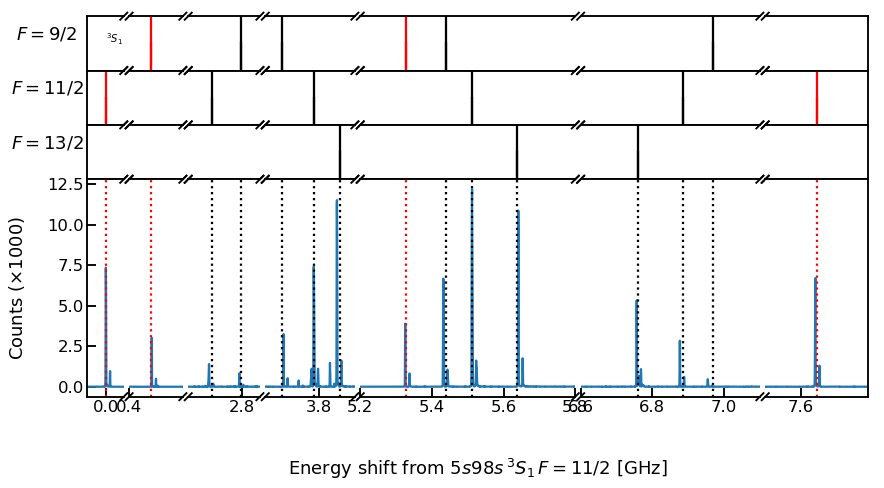

In [315]:
xdata = data_ex['uv_rel_freq']/1000
ydata = data_ex['avg_counts']/1000

xlimits = ((min(xdata), 0.05),
           (0.4, 0.55),
           (2.65, 2.85),
           (3.65, 3.9),
           (5.2, 5.8),
           (6.6, 7.1),
           (7.5, max(xdata)))

bax_kwargs = {'d':0.005,
              'wspace':0.05,
              'despine':False}

fig=plt.figure(figsize=(14,7))
gs=GridSpec(4,1, height_ratios=[1,1,1,4], wspace=0, hspace=0)

bax0 = brokenaxes(xlims=xlimits, subplot_spec=gs[0], fig=fig, **bax_kwargs)
bax1 = brokenaxes(xlims=xlimits, subplot_spec=gs[1], fig=fig, **bax_kwargs)
bax2 = brokenaxes(xlims=xlimits, subplot_spec=gs[2], fig=fig, **bax_kwargs)
bax3 = brokenaxes(xlims=xlimits, subplot_spec=gs[3], fig=fig, **bax_kwargs)

bax3.plot(xdata, ydata)

#####################################################
### Put in theory lines
ref_offset = 45919.8646
(ymin, ymax) = (0, 1)
color_S = 'red'
color_D = 'black'

for index, row in data_th.iterrows():
    xc = (row['E_theor']-ref_offset)*C
    
    if row['F']==9/2:
        if row['Series'] == '5sns':
            bax0.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
        
        elif row['Series'] == '5snd':
            bax0.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
    
    elif row['F']==11/2:
        if row['Series'] == '5sns':
            bax1.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
        
        elif row['Series'] == '5snd':
            bax1.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
    
    elif row['F']==13/2:
        if row['Series'] == '5sns':
            bax2.axvline(x=xc, color=color_S, ymin=ymin, ymax=ymax)
        
        elif row['Series'] == '5snd':
            bax2.axvline(x=xc, color=color_D, ymin=ymin, ymax=ymax)
            
    else:
        print('Error!')
    

# 5sns states
xcoord = np.array(data_th[data_th['Series']=='5sns']['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax3.axvline(x=xc, linestyle=':', color='red')

# 5snd states
xcoord = np.array(data_th[data_th['Series']=='5snd']['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax3.axvline(x=xc, linestyle=':', color='black')

# F=9/2, S-states states
xcoord = np.array(data_th[(data_th['F']==9/2) & (data_th['Series']=='5sns')]['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax0.axvline(x=xc, color='red', ymin=0, ymax=0.5)

# F=9/2, D-states states
xcoord = np.array(data_th[(data_th['F']==9/2) & (data_th['Series']=='5snd')]['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax0.axvline(x=xc, color='black', ymin=0, ymax=0.5)

# F=11/2, S-states states
xcoord = np.array(data_th[(data_th['F']==11/2) & (data_th['Series']=='5sns')]['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax1.axvline(x=xc, color='red', ymin=0, ymax=0.5)

# F=11/2, D-states states
xcoord = np.array(data_th[(data_th['F']==11/2) & (data_th['Series']=='5snd')]['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax1.axvline(x=xc, color='black', ymin=0, ymax=0.5)

# F=13/2, D-states states
xcoord = np.array(data_th[(data_th['F']==13/2) & (data_th['Series']=='5snd')]['E_theor']) - ref_offset
xcoord = xcoord*C
for xc in xcoord:
    bax2.axvline(x=xc, color='black', ymin=0, ymax=0.5)
    

#####################################################

bax0.set_ylabel(r'$F=9/2$', rotation=0, labelpad=40)
bax1.set_ylabel(r'$F=11/2$', rotation=0, labelpad=40)
bax2.set_ylabel(r'$F=13/2$', rotation=0, labelpad=40)
bax3.set_xlabel(r'Energy shift from $5s98s\,^{3}S_{1}\,F=11/2$ [GHz]', labelpad=40)
bax3.set_ylabel(r'Counts ($\times 1000$)', labelpad=60)

for bax in [bax0, bax1, bax2]:
    for ax in bax.axs:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)
    bax.set_spines()

bax3.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=True, direction='in')

plt.show()

In [312]:
bax0.axs[0]